<h1>**Introduction: Basic Machine Learning Project**<h1>
<h3>In this notebook, we will implement a basic machine learning project. We will go through the entire machine learning process, cleaning the data, exploring it to find trends, establishing a baseline model and evaluating several machine learning approaches for comparisons. Let's get started!<h3>
<h1>Dataset<h1>
<h3>The objective is to predict CLASS from the other variables which makes this a supervised, classification task. We have a set of training data with known labels, and we want the model to learn a mapping from the features (explanatory variables) to the target (the label) in this case the CLASS. It is a classification task because the CLASS is a binary variable<h3>

In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


In [72]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [73]:
#Set path of the file to read.
TrainSet_path = '/kaggle/input/ace-class-assignment/AMP_TrainSet.csv'

In [74]:
#Read the file into a variable TrainSet_data
TrainSet_data = pd.read_csv(TrainSet_path)

In [75]:
TrainSet_data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

<h1>Exploratory Data Analysis<h1>
<h3>The first step in solving a data science problem (once you have cleaned data) is exploratory data analysis (EDA). This is an open-ended process where we look for anomalies, interesting trends or patterns, and correlations in a dataset. These may be interesting in their own right and they can inform our modeling. Basically, we use EDA to find out what our data can tell us!<h3>

In [76]:

#Let’s look at a snapshot of our data as a pandas dataframe
TrainSet_data.head()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


In [77]:
#Check the shape of data
TrainSet_data.shape

(3038, 12)

In [78]:
#Summary statistics of our data
TrainSet_data.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


There are a total of 3038 observations with 12 variables. The CLASS column is our target variable, which makes this a **supervised, classification** machine learning task. It’s **supervised** because we have a set of training data with known targets and, during training, we want our model to learn to predict the CLASS from the other variables. CLASS is a **binary variable** which makes this a **bi-classification** problem.<br><br>
The primary variable of interest is the CLASS, so let’s take a look at the distribution to check for skew


Text(0.5, 1.0, 'Distribution of CLASS')

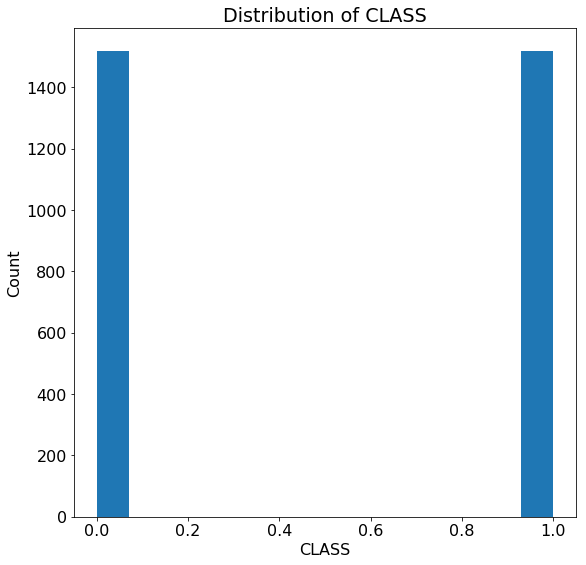

In [79]:
# Histogram of CLASS
plt.hist(TrainSet_data['CLASS'], bins = 14)
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.title('Distribution of CLASS')

<h1>PCA visualization<h1>
<h3>As we know it is difficult to visualize the data with so many features i.e **high dimensional** data so we can use PCA to find the two **principal components** hence visualize the data in **two-dimensional space** with a single **scatter plot**. But, before that, we need to pre-process the data i.e we need to **scale the data** such that each feature has unit variance and has not a greater impact than the other one<h3>


In [80]:
#Drop Target column, CLASS 
high_dim = TrainSet_data.drop(columns='CLASS')

#Scale the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(high_dim)

scaled_data = scaler.transform(high_dim)

In [81]:
# Specify number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
# Transform the data to its first 2 principal components.
x_pca = pca.transform(scaled_data)

In [83]:
#Check the shape of data before PCA

scaled_data.shape


(3038, 11)

In [84]:
#Check the shape of data after PCA

x_pca.shape

(3038, 2)

Text(0, 0.5, 'Second Principal Component')

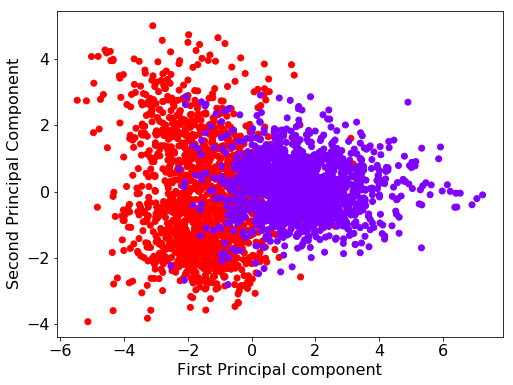

In [85]:
#Let’s plot these two dimensions out
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=TrainSet_data['CLASS'],cmap='rainbow')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal Component')

In [86]:
#Interpreting the components
#Not easy to understand these component reduction.The components correspond to combinations of the original features
#The components themselves are stored as an attribute of the fitted PCA object:

pca.components_

array([[-0.33520792,  0.4171638 ,  0.42227005,  0.40009094,  0.13336205,
         0.28745981, -0.12340874, -0.30531765,  0.35711352,  0.00688587,
        -0.19692794],
       [ 0.07424205,  0.05051049, -0.00242682, -0.14444511,  0.16414533,
         0.49660295, -0.2454373 , -0.07009948, -0.15253251, -0.61345381,
         0.48245538]])

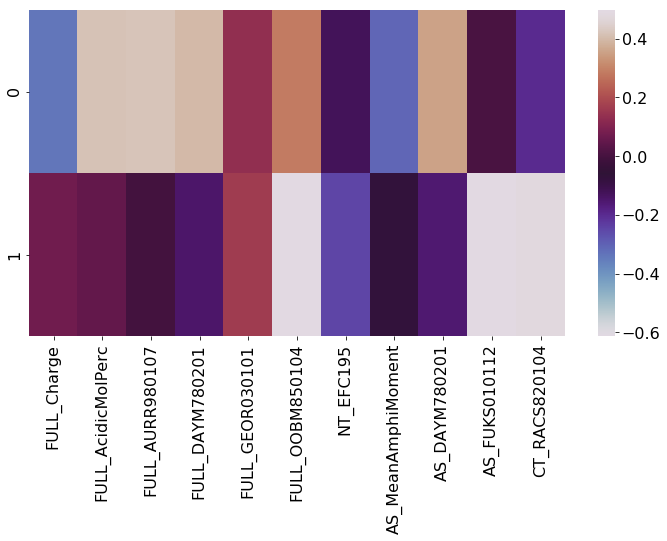

In [87]:
#Visualize this using heatmap-

map= pd.DataFrame(pca.components_,columns=high_dim.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

This heatmap and the color bar basically represent the **correlation** between the various feature and the principal component itself.
This is useful when you are dealing with the high dimensional dataset.

<h1>Feature Selection<h1>
<h3>We need to perform **feature selection (also called dimensionality reduction)** to choose only the “relevant” variables. This depends on the problem, but because we will be doing linear modeling in this project, we can use a simple measure called the **Correlation Coefficient** to determine the most useful variables for predicting a CLASS. This is a value between -1 and +1 that measures the direction and strength of a linear relationship between two variables.

To select a limited number of variables, we can find those that have the greatest correlation (either negative or positive) with the CLASS<h3>

In [88]:
#List all columns in the dataset from which to choose variables for modeling
TrainSet_data.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [89]:
# Find correlations and sort
TrainSet_data.corr()['CLASS'].sort_values()

FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_OOBM850104      -0.453287
AS_DAYM780201        -0.437168
FULL_GEOR030101      -0.260470
AS_FUKS010112         0.033432
NT_EFC195             0.260702
CT_RACS820104         0.267652
FULL_Charge           0.534602
AS_MeanAmphiMoment    0.693552
CLASS                 1.000000
Name: CLASS, dtype: float64

In this problem we will use these results to perform feature selection by retaining only the 8 variables that are most highly correlated with the CLASS. 8 is sort of an arbitrary number that I found works well in the model, which shows that a lot of machine learning is just experimentation!

While we are performing feature selection, we also split the data into a training and testing set using a Scikit learn function. This is necessary because we need to have a hold-out test set to evaluate our model and make sure it is not overfitting to the testing data:

In [90]:
# Takes in a dataframe, finds the most correlated variables with CLASS and returns training and testing datasets
def format_data(TrainSet_data):
    # Use the dot notation to select the column to predict <Prediction Target>. Call it y
    y = TrainSet_data.CLASS
    
    # Find correlations with CLASS
    most_correlated = TrainSet_data.corr().abs()['CLASS'].sort_values(ascending=False)
    
    # Maintain the top 8 most correlation features with CLASS
    most_correlated = most_correlated[:8]
    
    # X is features with top 8 most correlation with CLASS
    X = TrainSet_data.loc[:, most_correlated.index]
    
    #Import train_test_split from  scikit-learn library
    from sklearn.model_selection import train_test_split
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
    
    return X_train, X_test, y_train, y_test

In [91]:
#Snapshot of X_train dataset
X_train, X_test, y_train, y_test = format_data(TrainSet_data)
X_train.head()

,CLASS,AS_MeanAmphiMoment,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_Charge,FULL_OOBM850104,AS_DAYM780201
435,1,18.781,4.762,1.029,60.762,5.5,-2.190,62.722
887,1,27.954,0.000,0.758,42.750,5.0,-1.681,42.778
237,1,14.884,0.000,0.865,63.615,1.0,-4.846,63.615
1047,1,28.521,0.000,1.014,75.429,4.0,-5.026,76.833
109,1,5.109,0.000,0.809,55.667,2.0,-6.204,55.667


In [92]:
#Print shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(2278, 8)
(760, 8)


This leaves us with 2278 training observations and 760 testing data points.

<h1>Examine Selected Features<h1>
<h3>Pairs Plot** is  great for showing both distribution of variables and relations between pairs of variables. Here we use the **seaborn PairGrid function** to show a Pairs Plot for the selected features<h3>

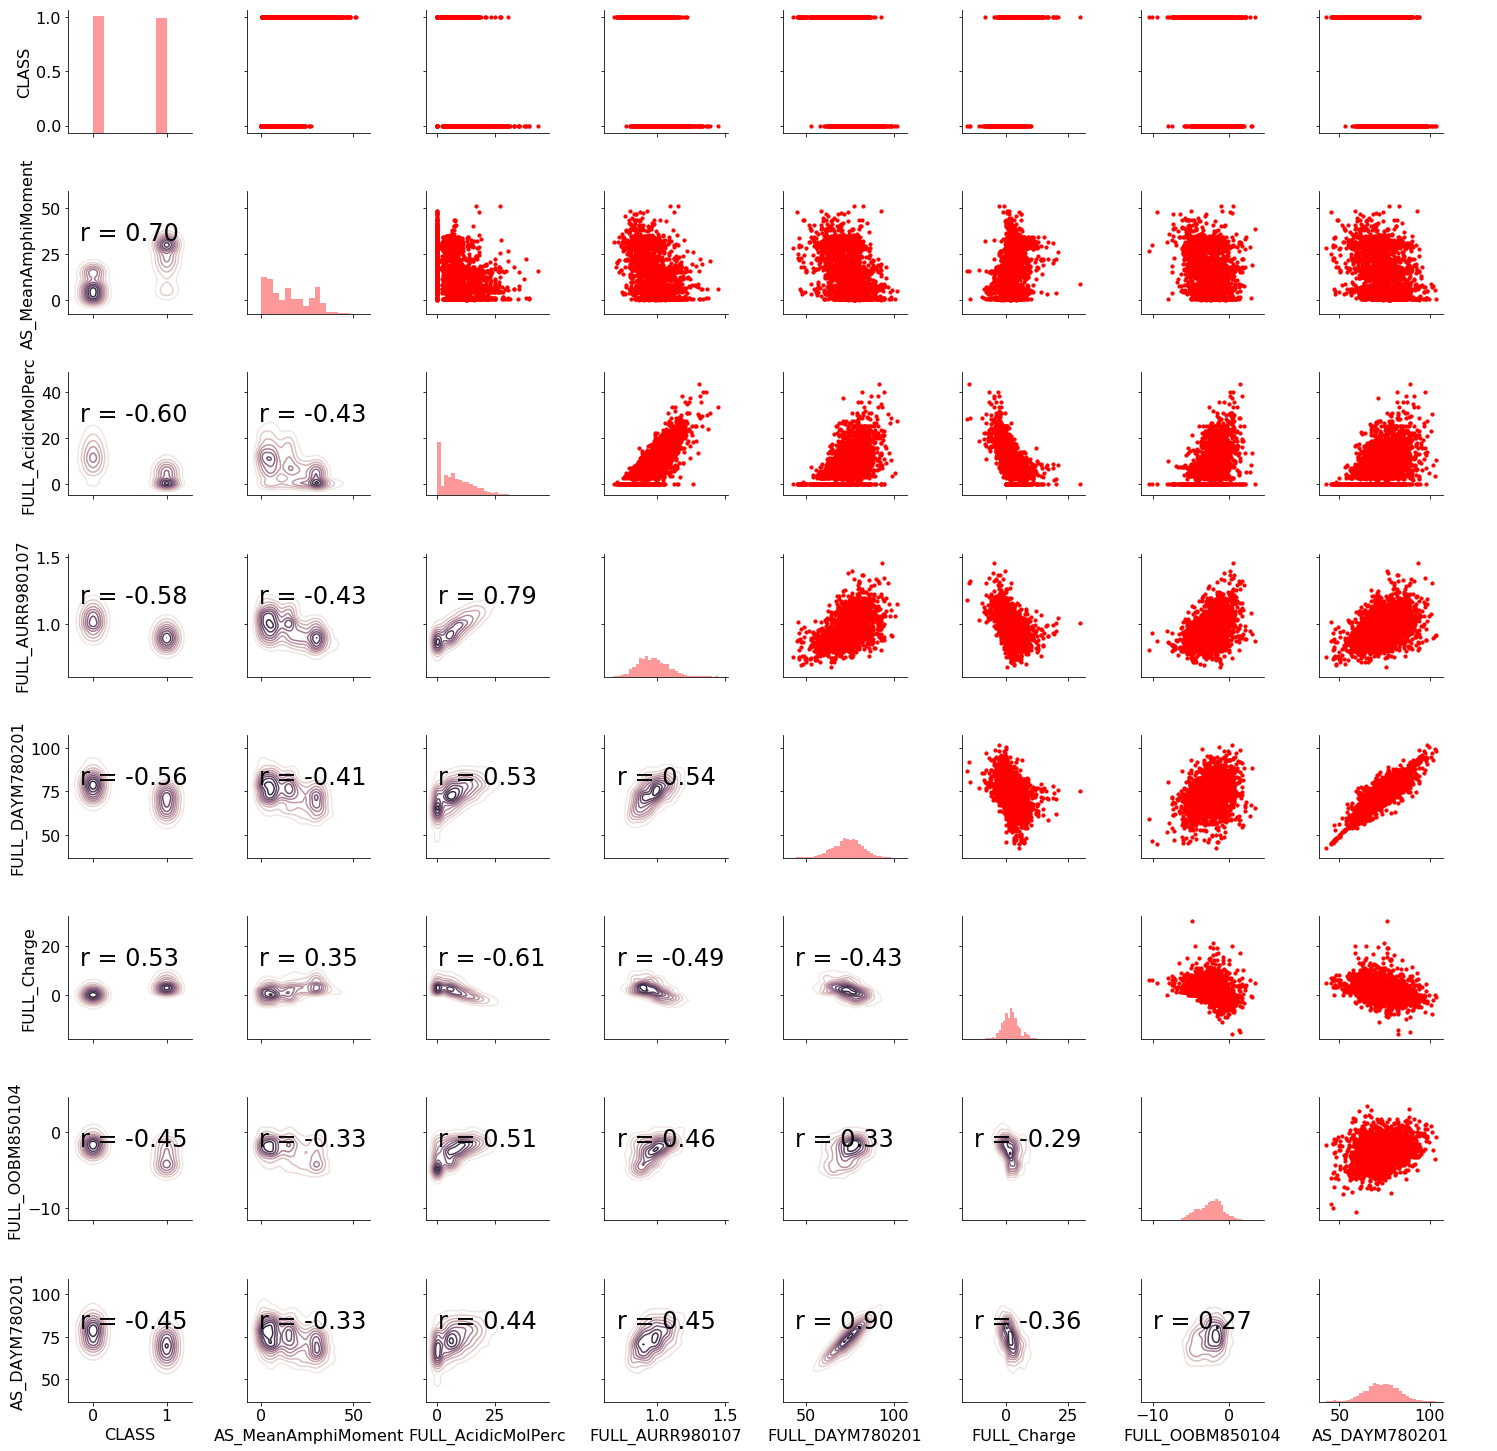

In [93]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

There is a lot of information encoded in this plot! On the upper triangle, we have scatterplots of every variable plotted against one another. Notice that most variables are continuous integers, meaning they takes on values in some interval of numbers. 
On the diagonal, we have histograms showing the distribution of a single variable. The lower right has both 2-D density plots and the correlation coefficient between variables.
To interpret the plot, we can select a variable and look at the row and column to find the relationships with all the other variables. For example, the first row shows the scatterplots of CLASS , our target, with the other variables. The first column shows the correlation coefficient between CLASS and the other variables. We see that **AS_MeanAmphiMoment** has the greatest correlation with CLASS in terms of absolute magnitude.

<h1>Selected Variables Distribution by Relation to Median<h1>

<h3>As another exploration of the selected data, we can make distribution plots of each variable, coloring the plot by if the CLASS is above the median score of 0. To make these plot, we create a column in our dataframe comparing CLASS to 0 and then plot all the values in density plots<h3>


In [94]:
# Create relation to the median CLASS column
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['CLASS'] <= 0)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'below', False: 'above'})
X_plot = X_plot.drop(columns='CLASS')

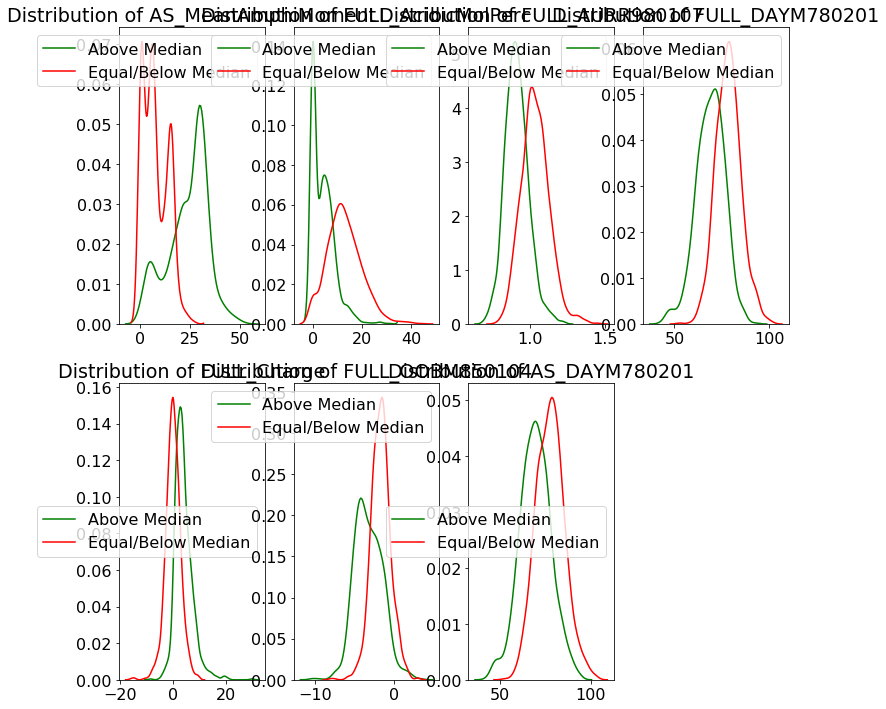

In [95]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored by the relation to the median CLASS
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(4, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green')
    sns.kdeplot(subset_below[col], label = 'Equal/Below Median', color = 'red')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

The green distributions represent CLASS at or above the median, and the red is below. We can see that some variables are more positively correlated with CLASS, while others show negative correlation with CLASS.

The EDA has given us a good sense of our dataset. We made figures, found relationships between variables, and used these to perform feature selection to retain only the variables most relevant for our task. While EDA is a precursor to modeling, it’s also useful on its own, and many data science problems can be solved solely through the plots and statistics we made here.

<h1>Establish Benchmarks<h1>

<h1>Metrics<h1>

<h3>One of the most overlooked aspects of the machine learning pipeline is establishing a baseline. Yes, it might look impressive if your classification model achieves 99% accuracy, but what if we could get 98% accuracy just by guessing the same class every time? Would we really want to spend our time building a model for that problem? A good baseline allows us to assess whether or not our model (or any model) is applicable to the task.

For regression, a good naive baseline is simply to guess the median value of the target for every observation in the test data. In our problem, the median is 0, so let’s assess the accuracy of a model that naively predicts 0 for every entry on the test set. We will use 2 metrics to evaluate predictions:
* Mean Absolute Error (MAE): The average of the absolute value of the differences between the predictions and true values.
* Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and true values.

The mean absolute error is easily interpretable, as it represents how far off we are on average from the correct value. The root mean squared error penalizes larger errors more heavily and is commonly used in regression tasks. Either metric may be appropriate depending on the situation and we will use both for comparison<h3>

In [58]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse


<h1>Naive Baseline<h1>

<h3>For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. If our machine learning model cannot better this simple baseline, then perhaps we should try a different approach!<h3>

In [59]:
# Naive baseline is the median
median_pred = X_train['CLASS'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['CLASS']

In [60]:
# Display the naive baseline metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.5132
Median Baseline RMSE: 0.7164


If our machine learning model cannot beat these metrics, then we either need to get more data, try another approach, or conclude that machine learning is not applicable to our problem!

<h1>Standard Machine Learning Models<h1>

<h3>It's helpful to compare results from standard techniques such as Linear Regression, Support Vector Machines, or tree-based methods applicable to this task. We will evaluate several of these methods on our dataset. Luckily, these are all implementable with Python libraries such as Scikit-Learn.<h3>

In [61]:

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error


# Distributions
import scipy

In [63]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest Regressor', 'Extra Trees Regressor', 
                      'SVM Regressor', 'Gradient Boosted Regressor', 
                      'Decision Tree classifier', 'Naives Bayes classifier', 
                      'GradientBoosting classifier', 'Random Forest Classifier',
                      'SVM classifier', 'LogisticRegression', 'AdaBoostClassifier', 
                      'XGBClassifier', 'Baseline']
    
    X_train = X_train.drop(columns='CLASS')
    X_test = X_test.drop(columns='CLASS')
    
    # Instantiate the models
    model1  = LinearRegression()
    model2  = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3  = RandomForestRegressor(n_estimators=50)
    model4  = ExtraTreesRegressor(n_estimators=50)
    model5  = SVR(kernel='linear', degree=3, C=1.0, gamma='auto')
    model6  = GradientBoostingRegressor(n_estimators=20)
    model7  = DecisionTreeClassifier(random_state=42)
    model8  = GaussianNB()
    model9  = RandomForestClassifier(random_state=42)
    model10 = GradientBoostingClassifier(random_state=42)
    model11 = SVC(kernel='linear', degree=3, C=1.0, gamma='auto')
    model12 = LogisticRegression(max_iter=200)
    model13 = AdaBoostClassifier(random_state=42)
    model14 = XGBClassifier(random_state=42)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, 
                               model7, model8, model9, model10, model11, model12, model13, model14]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
            
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [64]:
results = evaluate(X_train, X_test, y_train, y_test)


<h3>Visual Comparison of Models by Model Mean Absolute Error & Model Root Mean Squared Error<h3>

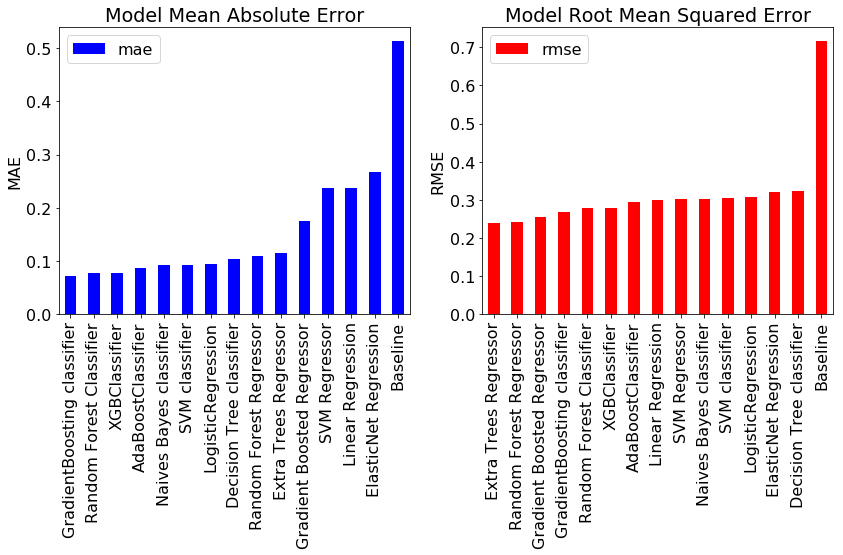

In [65]:
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [66]:
# Model Mean Absolute Error & Model Root Mean Squared Error
results

,mae,rmse
Linear Regression,0.23792,0.298807
ElasticNet Regression,0.26767,0.322049
Random Forest Regressor,0.110289,0.243195
Extra Trees Regressor,0.115237,0.239202
SVM Regressor,0.236848,0.301718
Gradient Boosted Regressor,0.175068,0.254522
Decision Tree classifier,0.103947,0.322409
Naives Bayes classifier,0.0921053,0.303488
GradientBoosting classifier,0.0723684,0.269014
Random Forest Classifier,0.0776316,0.278624


In [67]:
print('The Random Forest Classifier is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Random Forest Classifier', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Random Forest Classifier is 84.87% better than the baseline.


Fortunately, we see that all models best the baseline indicating that machine learning will work for this problem. Overall, the Random Forest regression method performs the best. 

<h1>Visualizing Decision Trees<h1>
<h3>Here, we are using Scikit-learn's export_graphviz function for display the tree. It converts random forest classifier into dot file<h3> 

In [68]:
#List all columns in the dataset from which to choose variables for modeling
X_train.columns

#Drop CLASS to remain with only selected features to be used for prediction
data= X_train.drop(columns='CLASS')
data.columns

#Create list of selected features to be used for prediction
feature_names = ['AS_MeanAmphiMoment', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_Charge', 'FULL_OOBM850104', 'AS_DAYM780201']

#Use the dot notation to select the column to predict <Prediction Target>. Call it target
target = X_train.CLASS

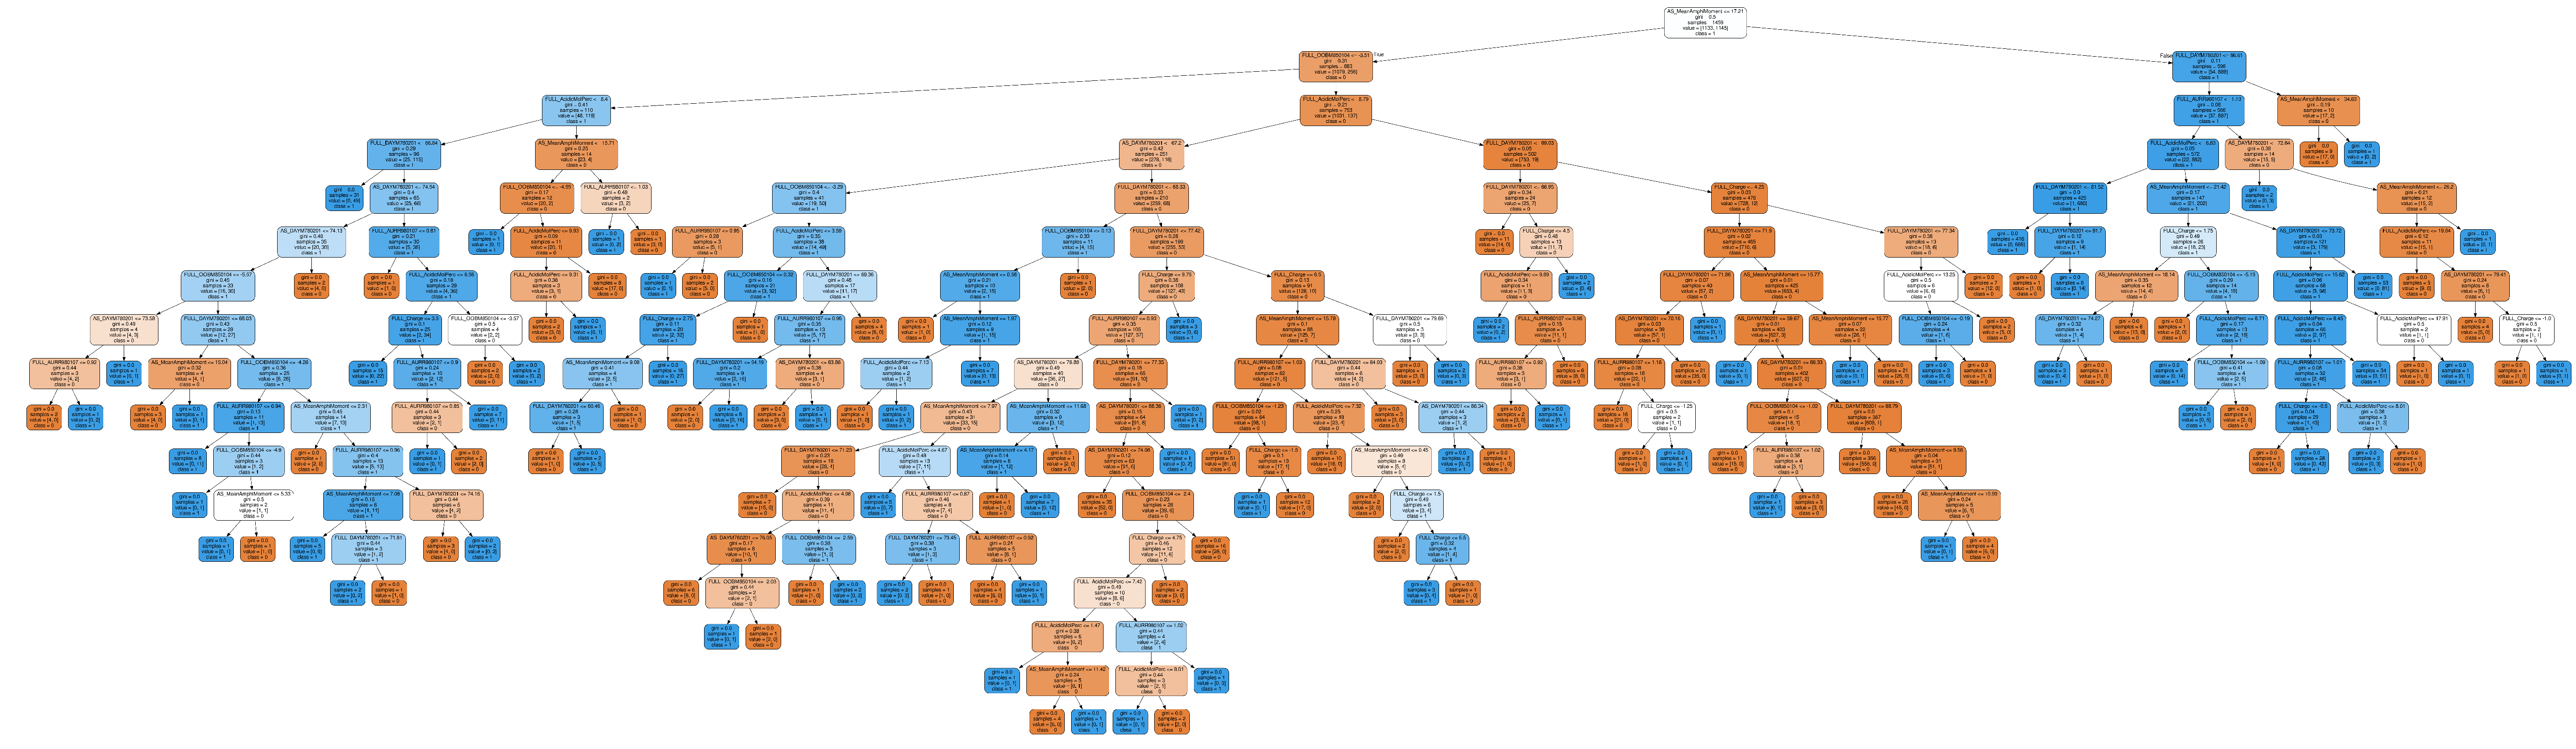

In [69]:

# Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train
model.fit(data, target)

estimator = model.estimators_[5]

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ['AS_MeanAmphiMoment', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
                                 'FULL_DAYM780201', 'FULL_Charge', 'FULL_OOBM850104', 'AS_DAYM780201'],
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display
plt.figure(figsize = (100, 80))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. So, let's optimize it by pruning.

<h1>Optimizing Decision Tree Performance<h1>
<h3>In Scikit-learn, optimization of decision tree is mostly performed by pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. Here, we plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.<h3>

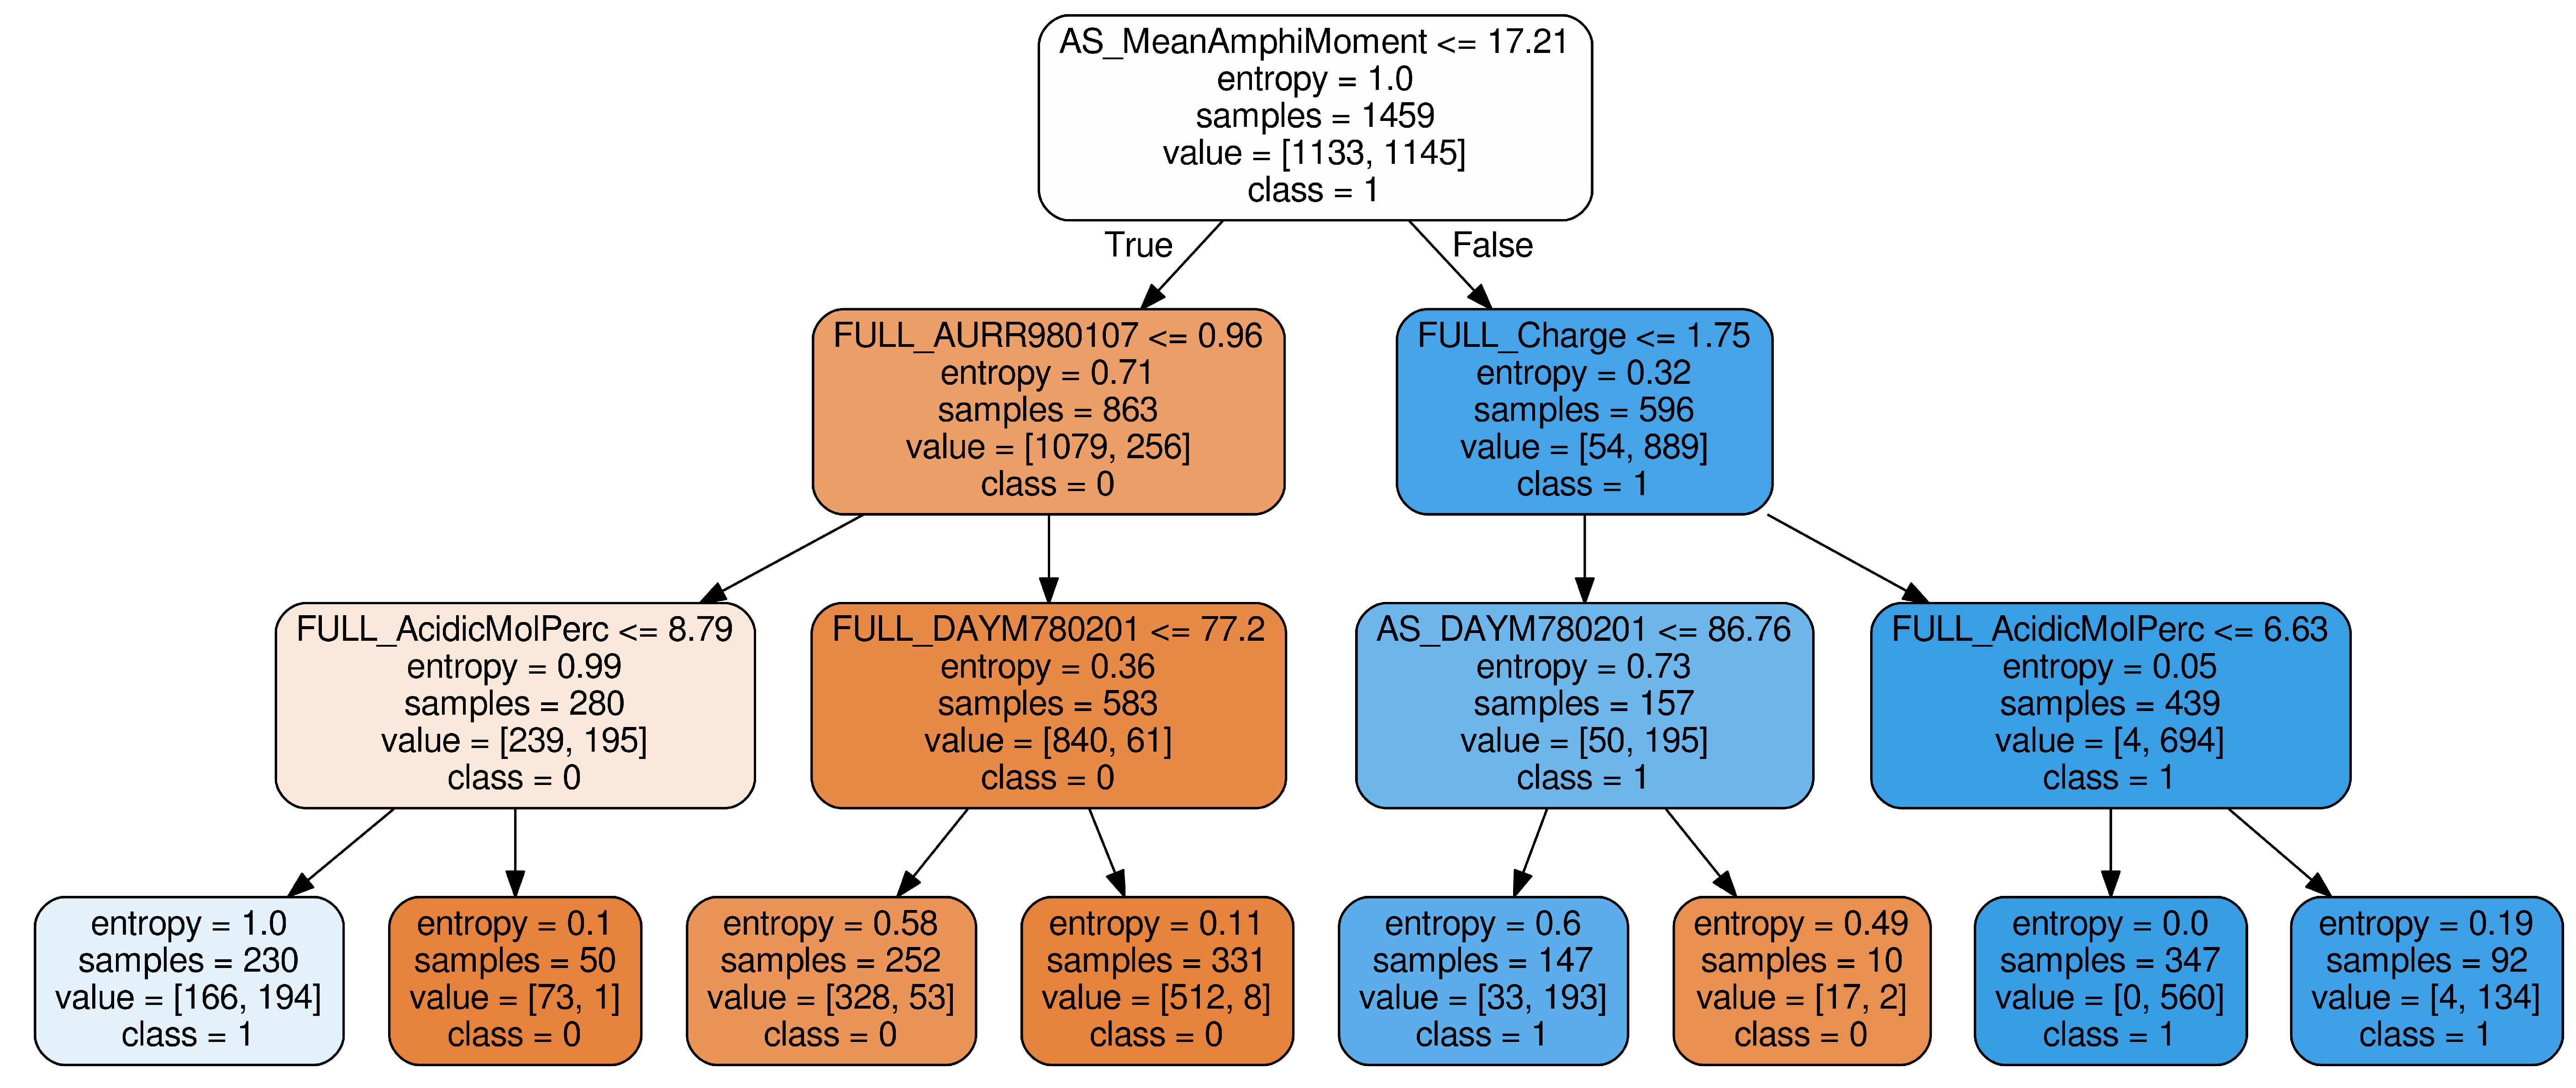

In [70]:

# Model
model = RandomForestClassifier(criterion="entropy", max_depth=3, random_state=42)

# Train
model.fit(data, target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ['AS_MeanAmphiMoment', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
                                 'FULL_DAYM780201', 'FULL_Charge', 'FULL_OOBM850104', 'AS_DAYM780201'],
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (100, 80))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot

<h3>Conclusions<h3>

While machine learning gets all the attention, it often comprises a small part of a data science project. Most of the work — and most of the value — comes in obtaining, cleaning, and exploring the data. Only once we have a firm grasp on the structure of our data and the relationships within it should we proceed to building machine learning models. I wanted to show the entire process in for this project to demonstrate a typical data science workflow. 
In this project we:
* Explored the data to find interesting patterns, trends, or anomalies
* Examined correlations between the features and the target
* Performed feature selection using correlation values
* Established a baseline and benchmarked machine learning models